### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
df=pd.read_csv("vehicle.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
newdf=df.dropna()

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [7]:
newdf['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### 3. Check for any missing values in the data 

In [8]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in newdf.columns:
    newdf[i]=sc.fit_transform(newdf[[i]])

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

ValueError: could not convert string to float: 'van'

In [10]:
newdf.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio class  
0         -0.321809       0.171837   van  
1          0.003400       0.442318   van  
2         -0.159204       0.036596   car  
3          1.629444       1.524243   van  
4         -1.460039      -1.721531   bus

### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [30]:
distortion=np.array(range(1,15))

In [31]:
distortion

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [12]:
newdf1=newdf.drop('class',axis=1)

Text(0, 0.5, 'interia')

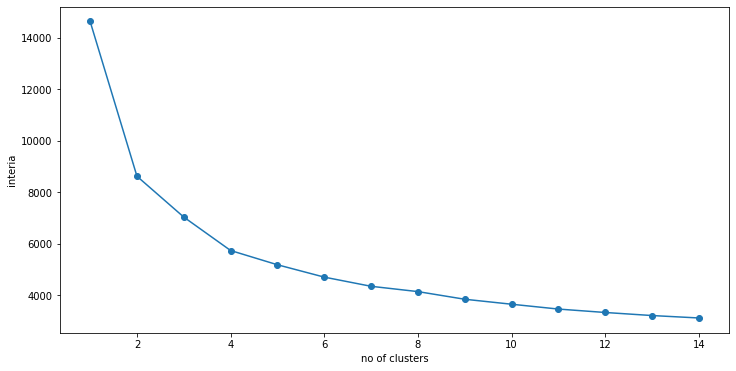

In [13]:
#finding the best n_clusters value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_range=range(1,15)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans(num_clusters)
    model.fit(newdf1)
    cluster_inertia.append(model.inertia_)
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_inertia,marker='o')
plt.xlabel("no of clusters")
plt.ylabel("interia")

### 8. Find out the optimal value of K

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [14]:
#n_clusters=2
k3=KMeans(n_clusters=3,n_init=15,random_state=2)
k3.fit(newdf1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [16]:
cent=pd.DataFrame(k3.cluster_centers_,columns=newdf1.columns)
cent

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.919871    -0.520093             -0.893208     -1.064356   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.233962    -0.573875             -0.307769     -0.030413   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.500422                -0.219074      -0.779121   
1              0.215052                 0.342508       1.271805   
2              0.205073                -0.116532      -0.459042   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.865893               -0.745356                  -0.484632   
1      -1.190612                1.275484                   1.092668   
2       0.325063               -0.487988                  -0.536044   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.782403          -0.783411                  -0.384982   
1         1.220381           1.281327                   1.079542   
2        -0.413809          -0.463663                  -0.601550   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.838787       -0.095243         -0.301716   
1                    -0.028795        0.162290          0.265665   
2                    -0.619241       -0.061780          0.010668   

   skewness_about.2  hollows_ratio  
0         -1.054206      -1.110695  
1         -0.005356       0.183801  
2          0.812786       0.698973

### 11. Use kmeans.labels_ function to print out the labels of the classes

In [17]:
pd.DataFrame(k3.labels_)[0].value_counts()

2    313
1    260
0    240
Name: 0, dtype: int64

In [22]:
newdf[newdf['class']=='car']['compactness'].mean()

0.31447617982595494

In [23]:

newdf[newdf['class']=='van']['compactness'].mean()


-0.38768768280310373

In [24]:
newdf[newdf['class']=='bus']['compactness'].mean()

-0.2647783615683634

In [25]:
import seaborn as sns

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


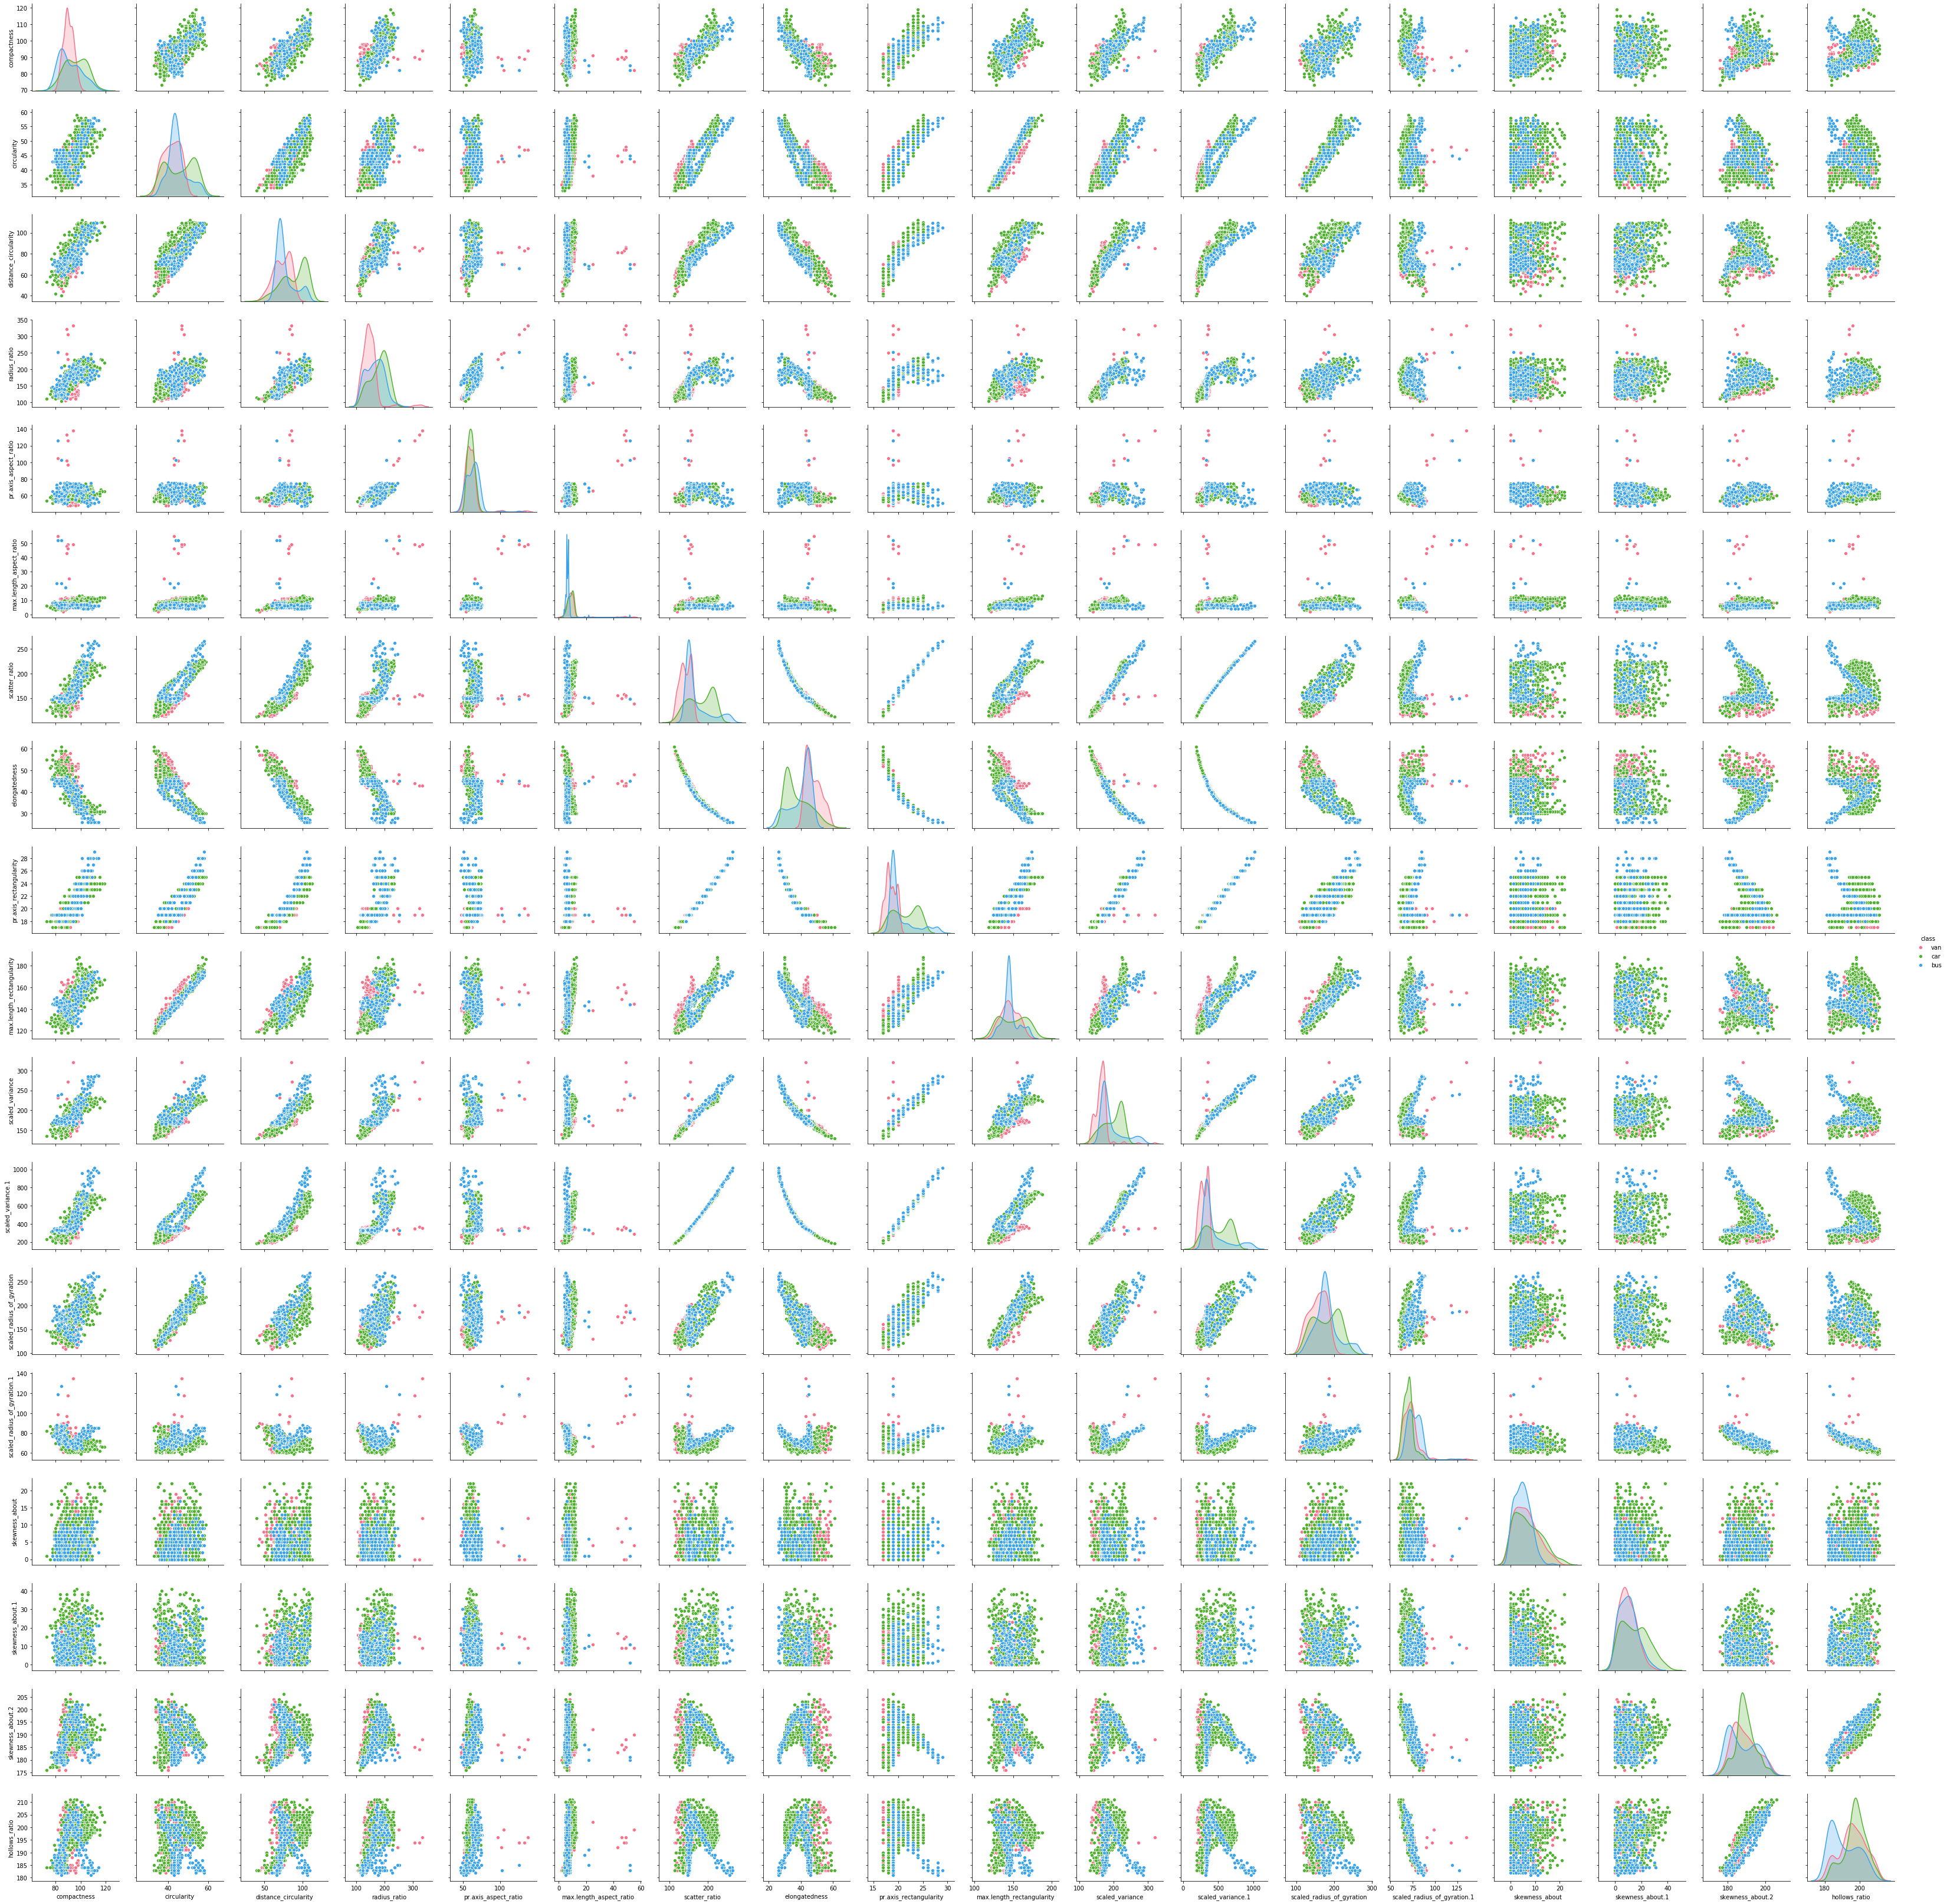

In [26]:
sns.pairplot(df,hue='class',palette='husl')

### 12. Use kmeans.labels_ function to print out the labels of the classes

In [28]:
df_with_label=newdf1.copy(deep=True)
df_with_label['labels']=k3.labels_

In [29]:
df_with_label

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4      -1.052030    -0.130753             -0.763506      1.068668   
6       0.406283    -0.293543             -0.573312      0.116137   
7      -0.444400    -0.293543             -1.017098     -0.360128   
8      -0.930504    -1.758654             -1.270690     -0.866160   
10     -0.930504    -1.433074             -0.763506     -0.776860   
11     -0.444400    -1.758654             -1.017098     -0.985226   
12     -0.687452     0.194828             -0.509914      0.056604   
13     -0.565926    -0.456333              0.187465     -0.747094   
14      0.041705     0.683198             -0.192923      1.009135   
15      0.284757     1.659939              1.328629      0.949602   
16     -0.565926    -1.433074             -1.968068     -1.788924   
17      0.649335    -0.619123             -0.319719      0.830535   
18      1.256966     1.497149              1.138435      0.503103   
20     -1.173556     0.357618             -0.446516     -0.479194   
21     -1.173556    -1.270284             -1.841272     -1.431725   
22      0.041705    -0.293543             -1.143894      0.116137   
23     -0.808978    -0.944703             -0.763506     -0.628027   
24      0.649335     1.334359              1.455425      1.485400   
25     -1.052030     0.032037             -0.129525     -0.449428   
26     -1.295083    -1.433074             -1.777874     -1.491258   
27      1.621544     1.497149              1.011639      1.009135   
28      1.013913     0.032037              0.187465      0.711469   
29     -1.659661    -1.107494             -1.207292     -1.193592   
30     -0.565926    -0.293543              0.187465     -0.270828   
31     -0.687452    -0.456333             -0.319719     -0.538728   
32     -0.079822    -1.595864             -1.017098     -0.449428   
..           ...          ...                   ...           ...   
816    -0.444400     0.520408              0.187465     -0.360128   
817     1.256966     1.334359              1.645620      1.038901   
818     0.163231    -0.293543              0.884843      0.979368   
819    -0.079822    -0.456333              1.011639      0.681702   
820    -0.808978    -1.107494             -0.700108     -1.372192   
821     1.256966     1.822729              0.884843      1.842599   
822     0.163231    -0.619123             -0.002729      0.026838   
823     1.378492     1.497149              1.455425      1.306800   
824     1.500018     1.659939              0.884843      0.800769   
825    -0.930504    -0.944703              0.124067     -0.598261   
826     0.163231     0.683198              0.631251      0.711469   
827     0.649335     1.985519              1.138435      0.235204   
828    -0.565926    -0.456333             -1.017098     -1.312659   
829     0.163231     0.683198             -0.002729     -0.895926   
830     0.406283    -1.270284             -0.763506      0.116137   
831     0.770861     0.357618             -0.763506      0.473336   
832     1.743070     0.683198              1.709018      1.038901   
833    -0.201348     0.194828              0.060669     -0.449428   
834    -1.416609    -1.433074             -1.968068     -1.640091   
835     2.107648     2.148309              1.455425      0.413803   
836    -0.808978     0.032037             -1.017098     -0.895926   
837     0.041705     0.194828             -0.319719     -0.002929   
838     0.163231    -0.293543             -0.383118     -0.806627   
839    -0.444400    -0.130753             -0.636710     -0.360128   
840    -0.079822    -1.758654             -1.017098     -0.866160   
841    -0.079822    -0.944703              0.314261      0.413803   
842